In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/Admission_Predict_Ver1.1.csv")

In [3]:
df.shape

(500, 9)

In [4]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [5]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df = df.drop(columns=["Serial No."])

In [7]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


Now splitting into X and y

In [8]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [9]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [10]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

Now splitting dataset into train and test splits

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=1)

Now before sending our values into the Neural Network we will do Min-Max scaling

Note that we are applyting Min-Max Scaler only after splitting our dataset.

Also test dataset will be untouched during feature engineering.

We do feature engineering only on training sets

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

Now lets build our Neural Network

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [35]:
model = Sequential()

model.add(Dense(7, activation = 'relu', input_dim = 7))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

/Users/shivangsingh/Desktop/Shivang/Shivang_Codes/CampusX/Deep Learning Series/venvDL/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(loss = 'mean_squared_error', optimizer='Adam', metrics = [keras.metrics.RootMeanSquaredError()])

In [38]:
train_history = model.fit(X_train_scaled, y_train, epochs=500, validation_split=0.2)

Epoch 1/500


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1675 - root_mean_squared_error: 0.4091 - val_loss: 0.1191 - val_root_mean_squared_error: 0.3452
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1045 - root_mean_squared_error: 0.3227 - val_loss: 0.0631 - val_root_mean_squared_error: 0.2512
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0580 - root_mean_squared_error: 0.2407 - val_loss: 0.0366 - val_root_mean_squared_error: 0.1913
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0365 - root_mean_squared_error: 0.1910 - val_loss: 0.0296 - val_root_mean_squared_error: 0.1722
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0330 - root_mean_squared_error: 0.1815 - val_loss: 0.0280 - val_root_mean_squared_error: 0.1673
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0304 - root_mean_squared_error: 0.1742 - val_loss: 0.0262 - val_root_mean_squared_error: 0.1618
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0288 - ro

In [39]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [40]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7715926816460715

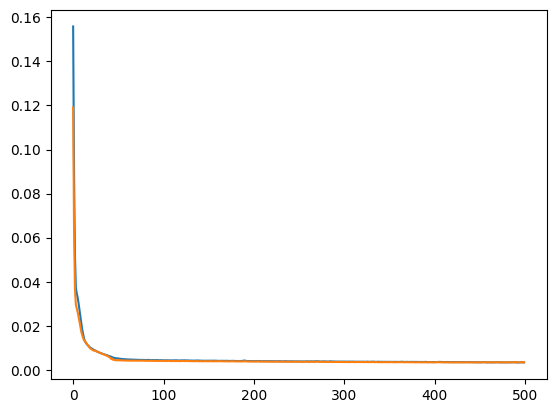

In [41]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])